# <img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# California Housing Price Prediction

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from seaborn import pairplot as pp
from sklearn.decomposition import PCA

# 1. Load the data

In [2]:
chpp_df = pd.read_csv("./Dataset for the project/housing.csv")
chpp_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [3]:
X = chpp_df.iloc[:, :-1].values
Y = chpp_df.iloc[:, -1].values
print (X)

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]


In [4]:
print (Y)

[452600 358500 352100 ...  92300  84700  89400]


In [5]:
chpp_df.shape

(20640, 10)

# 2. Handle missing values

In [6]:
chpp_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
#Get number of Null Values
def get_null_count(chpp_df):
    for i in chpp_df.columns:
        print(i,': ',len(chpp_df[chpp_df[i].isnull()][i]))

In [8]:
get_null_count(chpp_df)

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  207
population :  0
households :  0
median_income :  0
ocean_proximity :  0
median_house_value :  0


In [9]:
def remove_nan(chpp_df):
    for i in range(20640):
        if(math.isnan(chpp_df['total_bedrooms'][i]) == True):
            chpp_df['total_bedrooms'][i] = float(0)

In [10]:
remove_nan(chpp_df)
get_null_count(chpp_df)

C:\Users\Maheskumar_P\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  0
population :  0
households :  0
median_income :  0
ocean_proximity :  0
median_house_value :  0


In [11]:
chpp_df.mean()

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           532.476211
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

# 3. Encode categorical data

In [12]:
print(chpp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [13]:
cat_chpp_df = chpp_df.select_dtypes(include=['object']).copy()
print (cat_chpp_df.head())

  ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY


In [14]:
chpp_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
replace_map = {'ocean_proximity': {'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4,
                                  'ISLAND': 5}}
labels = cat_chpp_df['ocean_proximity'].astype('category').cat.categories.tolist()
replace_map_comp = {'ocean_proximity' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'ocean_proximity': {'<1H OCEAN': 1, 'INLAND': 2, 'ISLAND': 3, 'NEAR BAY': 4, 'NEAR OCEAN': 5}}


In [16]:
cat_chpp_df_replace = cat_chpp_df.copy()
cat_chpp_df_replace.replace(replace_map_comp, inplace=True)

print(cat_chpp_df_replace.head())

   ocean_proximity
0                4
1                4
2                4
3                4
4                4


In [17]:
total = chpp_df.isnull().sum().sort_values(ascending=False)
percent = total
total

median_house_value    0
ocean_proximity       0
median_income         0
households            0
population            0
total_bedrooms        0
total_rooms           0
housing_median_age    0
latitude              0
longitude             0
dtype: int64

In [18]:
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
median_house_value,0,0
ocean_proximity,0,0
median_income,0,0
households,0,0
population,0,0
total_bedrooms,0,0
total_rooms,0,0
housing_median_age,0,0
latitude,0,0
longitude,0,0


# 4. Split the dataset

In [19]:
chpp_df_copy = chpp_df
labels = chpp_df_copy['ocean_proximity'].astype('category').cat.categories.tolist()
replace_map_comp_copy = {'ocean_proximity' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
chpp_df_copy_replace = chpp_df_copy.copy()
chpp_df_copy_replace.replace(replace_map_comp_copy, inplace=True)
print(chpp_df_copy_replace.head())
np.where(chpp_df_copy_replace.values == int(np.finfo(np.float64).max))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  median_house_value  
0         322         126         8.3252                4              452600  
1        2401        1138         8.3014                4              358500  
2         496         177         7.2574                4              352100  
3         558         219         5.6431                4              341300  
4         565         259         3.8462                4              342200  


(array([], dtype=int64), array([], dtype=int64))

In [20]:
X = chpp_df_copy_replace.iloc[:, :-1].values
Y = chpp_df_copy_replace.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [21]:
print (X)

[[-122.23     37.88     41.     ...  126.        8.3252    4.    ]
 [-122.22     37.86     21.     ... 1138.        8.3014    4.    ]
 [-122.24     37.85     52.     ...  177.        7.2574    4.    ]
 ...
 [-121.22     39.43     17.     ...  433.        1.7       2.    ]
 [-121.32     39.43     18.     ...  349.        1.8672    2.    ]
 [-121.24     39.37     16.     ...  530.        2.3886    2.    ]]


In [22]:
print ("X_train : ","\n",X_train,"\n","X_test : ","\n",X_test,"\n","Y_train : ","\n",Y_train,"\n","Y_test : ","\n",Y_test)

X_train :  
 [[-117.55     33.83      6.     ...   65.        4.2386    2.    ]
 [-122.44     37.73     52.     ...  447.        4.3898    4.    ]
 [-118.       33.83     26.     ...  368.        3.9333    1.    ]
 ...
 [-121.9      36.58     31.     ...  393.        3.1977    5.    ]
 [-117.93     33.62     34.     ...  468.        5.6315    1.    ]
 [-115.56     32.8      15.     ...  298.        1.3882    2.    ]] 
 X_test :  
 [[-117.05     32.58     22.     ...  371.        4.1518    5.    ]
 [-117.97     33.92     32.     ...  429.        5.7796    1.    ]
 [-121.84     38.65     29.     ...  534.        4.3487    2.    ]
 ...
 [-120.92     38.86     11.     ...  326.        3.2027    2.    ]
 [-121.95     37.96     18.     ...  374.        6.1436    2.    ]
 [-118.2      34.12     52.     ...  406.        3.3326    1.    ]] 
 Y_train :  
 [500001 270000 196100 ... 289300 484600  69400] 
 Y_test :  
 [136900 241300 200700 ... 128600 259500 167600]


# 5. Standardize data

In [23]:
scaler = StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_train_std

array([[ 1.00389865, -0.8400624 , -1.79507596, ..., -1.1356496 ,
         0.19001247, -0.11814798],
       [-1.43477229,  0.98536392,  1.85553889, ..., -0.13688171,
         0.26931072,  1.28686421],
       [ 0.77948108, -0.8400624 , -0.20785212, ..., -0.34343319,
         0.02989505, -0.82065408],
       ...,
       [-1.1654712 ,  0.44709718,  0.18895385, ..., -0.27806879,
        -0.35589721,  1.98937031],
       [ 0.81439048, -0.93835459,  0.42703742, ..., -0.08197562,
         0.92053182, -0.82065408],
       [ 1.99632302, -1.32216217, -1.08082523, ..., -0.52645348,
        -1.30490629, -0.11814798]])

In [24]:
X_test_std=scaler.fit_transform(X_test)
X_test_std

array([[ 1.27553168, -1.44384333, -0.53669453, ..., -0.33869458,
         0.1622391 ,  2.01789834],
       [ 0.81470551, -0.81571379,  0.26181872, ..., -0.18674914,
         1.03200015, -0.82070597],
       [-1.12376978,  1.40148974,  0.02226475, ...,  0.08832451,
         0.2674461 , -0.11105489],
       ...,
       [-0.66294361,  1.49992795, -1.41505912, ..., -0.45658328,
        -0.34488107, -0.11105489],
       [-1.17886856,  1.0780499 , -0.85609984, ..., -0.33083533,
         1.2264915 , -0.11105489],
       [ 0.69949897, -0.72196311,  1.85884524, ..., -0.24700336,
        -0.2754733 , -0.82070597]])

# 6. Perform Linear Regression

In [43]:
model_multivariate = LinearRegression()
model_multivariate.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# Perform prediction and model score
y_pred = model_multivariate.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print("Model Score for Training data: {}".format(model_multivariate.score(X_train,Y_train)))
print("Model Score for Testing data: {}".format(r2_score(Y_test,y_pred)))
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(Y_test,y_pred))))

Model Score for Training data: 0.6371035927745601
Model Score for Testing data: 0.6243276835191247
Root Mean Squared Error is 69989.98205023243


# 7. Perform Decision Tree Regression

In [47]:
model_decision = DecisionTreeRegressor(random_state=48)
model_decision.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=48, splitter='best')

In [48]:
y_pred = model_decision.predict(X_test)
from sklearn.metrics import r2_score
print("Model Score for Training data: {}".format(model_decision.score(X_train,Y_train)))
print("Model Score for Testing data: {}".format(r2_score(Y_test,y_pred)))
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(Y_test,y_pred))))

Model Score for Training data: 1.0
Model Score for Testing data: 0.6561961959569343
Root Mean Squared Error is 66955.55658169264


# 8. Perform Random Forest Regression

In [50]:
model_random = RandomForestRegressor(n_estimators=35,random_state=15)
model_random.fit(X_train,Y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
           oob_score=False, random_state=15, verbose=0, warm_start=False)

In [51]:
# Perform prediction and model score
y_pred = model_random.predict(X_test)
from sklearn.metrics import r2_score
print("Model Score for Training data: {}".format(model_random.score(X_train,Y_train)))
print("Model Score for Testing data: {}".format(r2_score(Y_test,y_pred)))
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(Y_test,y_pred))))

Model Score for Training data: 0.9717784203163204
Model Score for Testing data: 0.8104052085437735
Root Mean Squared Error is 49721.53032366305


# 9. Bonus exercise: Perform Linear Regression with one independent variable

In [58]:
model_linear = LinearRegression()
model_linear.fit(X_train,y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# Perform prediction and model score
y_pred = model_linear.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

-48878659680.2916

No handles with labels found to put in legend.


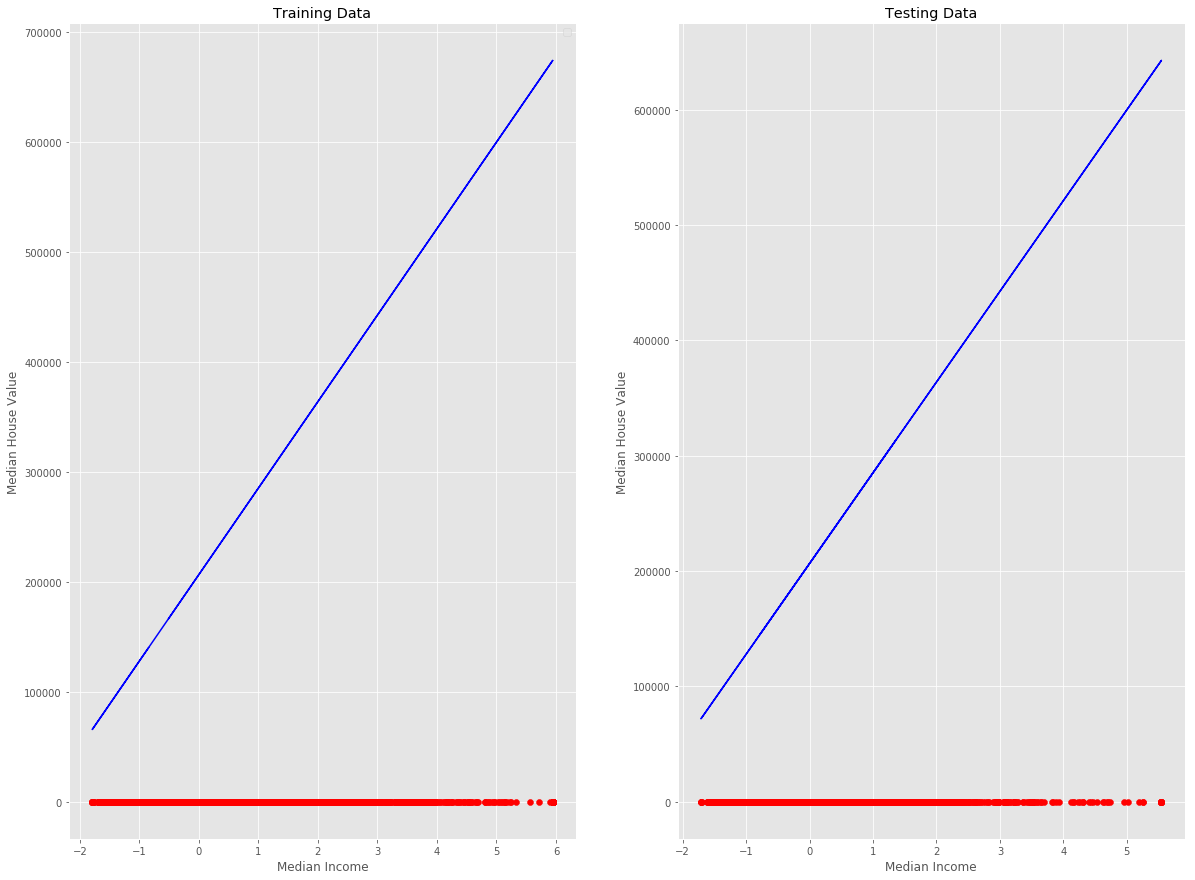

In [67]:
# lot the graph for Training set and Testing set and see the visualization of the dataset
plt.style.use("ggplot")
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train,model_linear.predict(X_train),color="blue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

plt.subplot(1,2,2)
plt.title("Testing Data")
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_test,y_pred,color="blue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

plt.show()

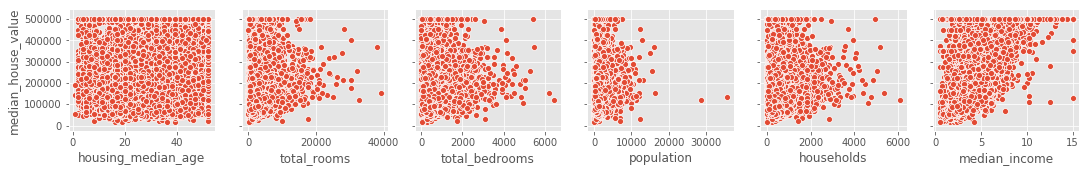

In [63]:
pp(chpp_df,x_vars=["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"],y_vars="median_house_value")